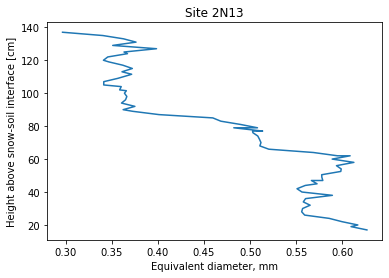

In [2]:
from read_CT_txt_files import read_CT_txt_files
import matplotlib.pyplot as plt


site='2N13'

data_dir='/Users/mtd/GitHub/microstructure/data/microCT/' + site + '/'
[SSA_CT,height_min,height_max]=read_CT_txt_files(data_dir)

fig,ax = plt.subplots()
ax.plot(6/917/SSA_CT*1000,height_min,label='microCT')        #CT data
ax.set_xlabel('Equivalent diameter, mm')
ax.set_ylabel('Height above snow-soil interface [cm]')
ax.set_title('Site {}'.format(site.upper()))
plt.show()